***
## required library

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.decomposition import PCA

import string
import nltk
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for visualization
plt.style.use('fivethirtyeight')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***
## read the data

In [3]:
# load data by using pandas command [pd.read_csv]
train = pd.read_csv('Train_set.csv')
train

,Unnamed: 0,id,Body,Label
0,4006,83044,"Subject: new jcc stuff vince , i ' m gone thr...",0.0
1,6645,36465,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0
2,13662,30041,Subject: we need your help\n dear southtrust c...,1.0
3,7706,72756,bank accountdoctyp html public wnumbercdtd htm...,1.0
4,10855,54804,Subject: dinner speaker - may 23\n vince :\n m...,0.0
...,...,...,...,...
13148,9225,68399,Subject: re : test dear vince : the email add...,0.0
13149,13123,6407,"Subject: all graphics software available , che...",1.0
13150,9845,56243,Subject: introduction of the european gas advi...,0.0
13151,10799,70202,"Subject: credit business plan hi jeff , my r...",0.0


In [4]:
# load data by using pandas command [pd.read_csv]
test = pd.read_csv('Test_set.csv')
test

,Unnamed: 0,id,Body
0,4934,22406,Subject: i ' m a changed man\n dear sir / mada...
1,8832,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,11742,59875,Subject: ngx - enron - security in place .\n h...
3,1514,40297,Subject: sitara availability\n as a precaution...
4,4431,50696,Subject: inception document for gtv ii phase i...
...,...,...,...
5633,3050,79976,Subject: are you lonely or horney ?\n 100 % fr...
5634,17161,53867,Subject: career opportunity dear mr . kaminsk...
5635,17696,50221,Subject: abb on eol\n calpine and nrg risk man...
5636,1615,64131,bad focusclick behaviourtoni nugent sender dat...


### a littel visualization before the process

Text(0.5, 1.0, 'WordCloud for train ')

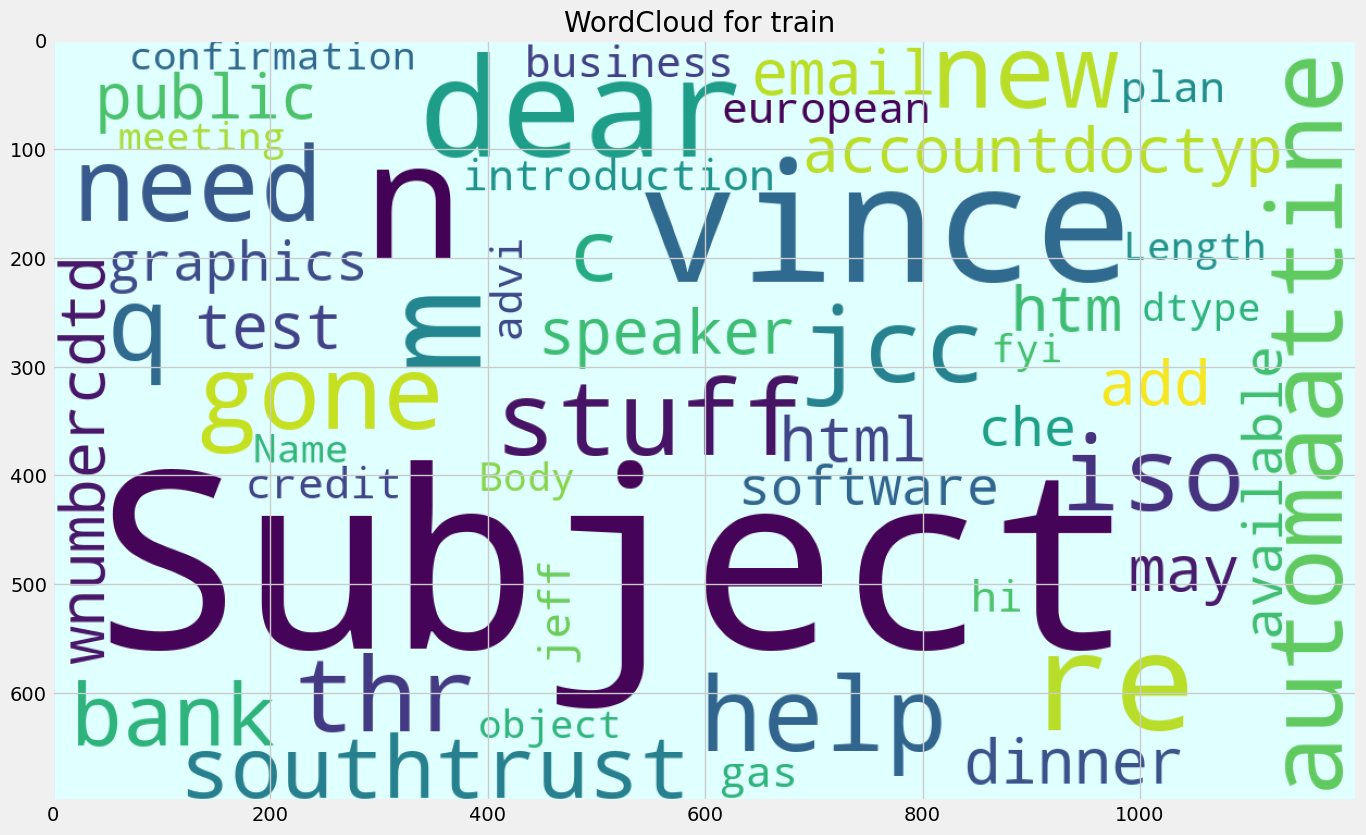

In [5]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

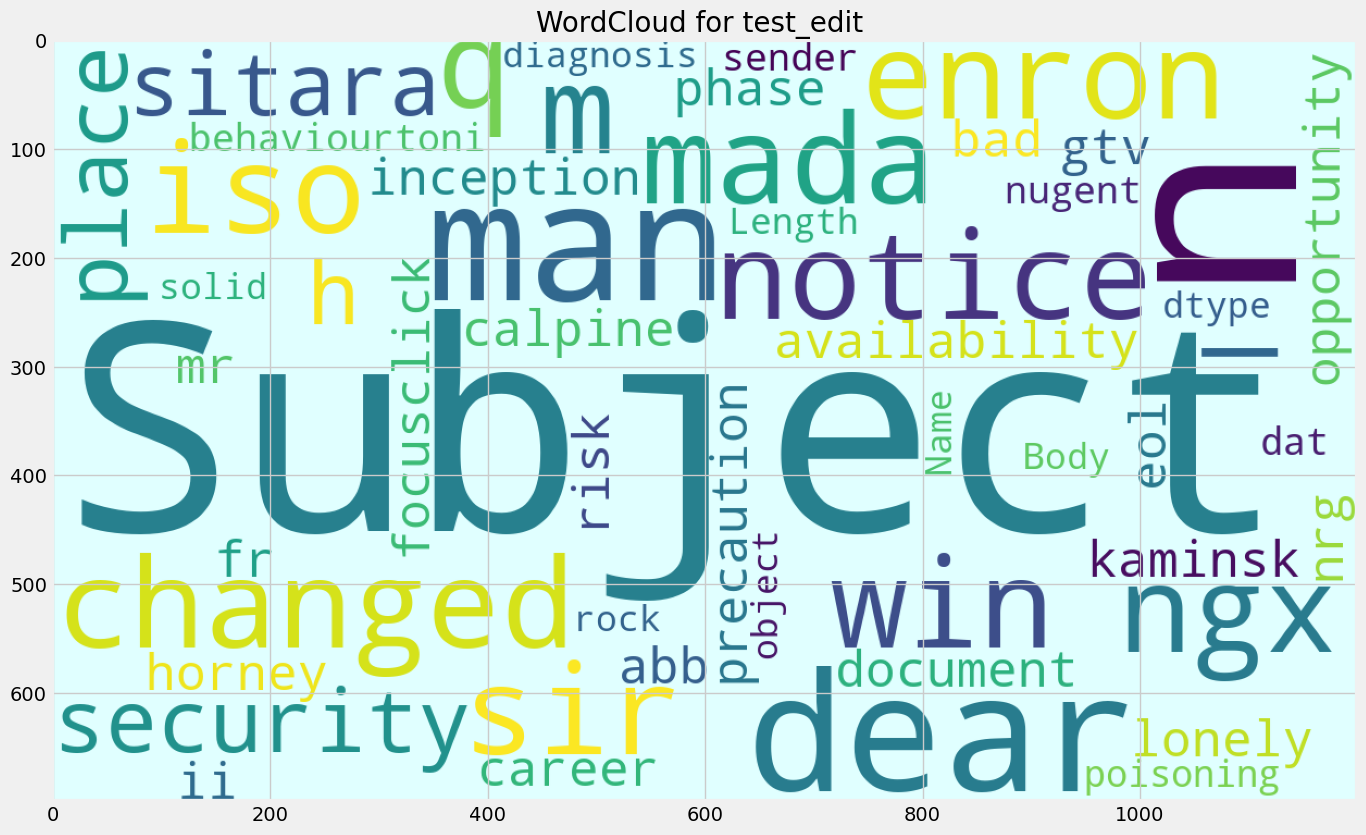

In [6]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

***
### Drop the unnecessary data

In [7]:
train = train.drop(columns=['Unnamed: 0','id'])

In [8]:
test = test.drop(columns=['Unnamed: 0'])
test

,id,Body
0,22406,Subject: i ' m a changed man\n dear sir / mada...
1,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,59875,Subject: ngx - enron - security in place .\n h...
3,40297,Subject: sitara availability\n as a precaution...
4,50696,Subject: inception document for gtv ii phase i...
...,...,...
5633,79976,Subject: are you lonely or horney ?\n 100 % fr...
5634,53867,Subject: career opportunity dear mr . kaminsk...
5635,50221,Subject: abb on eol\n calpine and nrg risk man...
5636,64131,bad focusclick behaviourtoni nugent sender dat...


In [9]:
test_edit = test.drop(columns=['id'])

In [10]:
test_edit

,Body
0,Subject: i ' m a changed man\n dear sir / mada...
1,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,Subject: ngx - enron - security in place .\n h...
3,Subject: sitara availability\n as a precaution...
4,Subject: inception document for gtv ii phase i...
...,...
5633,Subject: are you lonely or horney ?\n 100 % fr...
5634,Subject: career opportunity dear mr . kaminsk...
5635,Subject: abb on eol\n calpine and nrg risk man...
5636,bad focusclick behaviourtoni nugent sender dat...


***
## 1. Text Preprocessing

In [11]:
train['Body'].isnull().sum()

0

In [12]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if not word.lower().startswith("subject")]
    words = [word for word in words if word.lower() != "re" and word.lower() != "'re"]
    words = [word for word in words if not word.startswith("http")]
    #words = [word for word in words if not word.isdigit()]
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word.lower() not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text


### apply the preprocessing in training and testing

In [13]:
train['Body'] = train['Body'].apply(preprocess_text)

In [14]:
train['Body']

0        new jcc stuff vince gone wednesday next week p...
1        iso 8859 1 q automaattinen poissaolovastaus 6 ...
2        need help dear southtrust customer fraudulent ...
3        bank accountdoctyp html public wnumbercdtd htm...
4        dinner speaker may 23 vince michael crew would...
                               ...                        
13148    test dear vince email address candice cgkao mt...
13149    graphics software available cheap oem versions...
13150    introduction european gas advisory service eur...
13151    credit business plan hi jeff research colleagu...
13152    confirmation meeting fyi forwarded shirley cre...
Name: Body, Length: 13153, dtype: object

In [15]:
test_edit['Body'] = test_edit['Body'].apply(preprocess_text)

In [16]:
test_edit['Body']

0       changed man dear sir madam p prisonhouse lease...
1       iso 8859 1 q win notice uk afro aussie lottery...
2       ngx enron security place hi everybody short no...
3       sitara availability precautionary measure yest...
4       inception document gtv ii phase ii attached pl...
                              ...                        
5633    lonely horney 100 free adult personals need ge...
5634    career opportunity dear mr kaminski recently s...
5635    abb eol calpine nrg risk management guys wante...
5636    bad focusclick behaviourtoni nugent sender dat...
5637    poisoning diagnosis rock solid cnn doctor over...
Name: Body, Length: 5638, dtype: object

***
### plotting the most frequent words

Text(0.5, 1.0, 'WordCloud for train ')

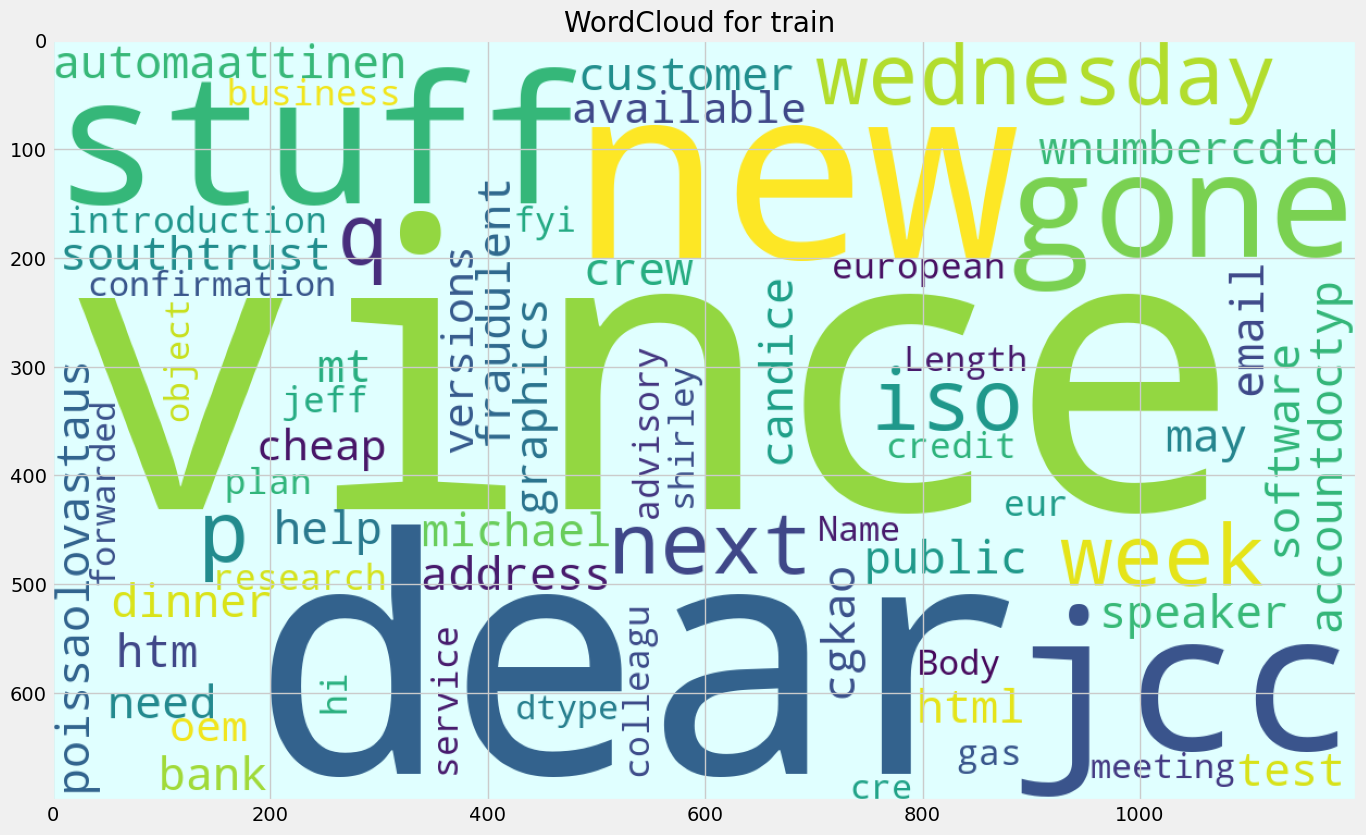

In [17]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

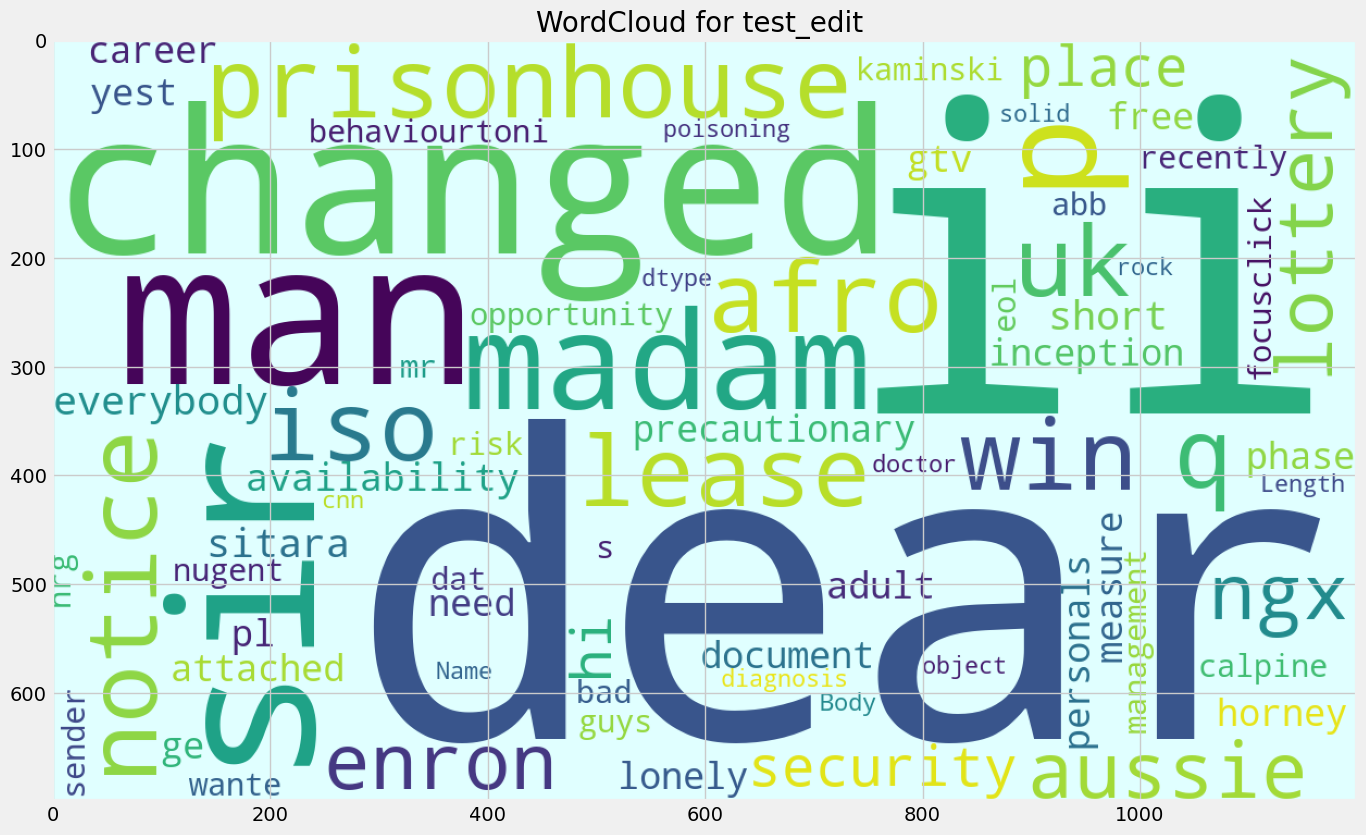

In [18]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test_edit['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for train')

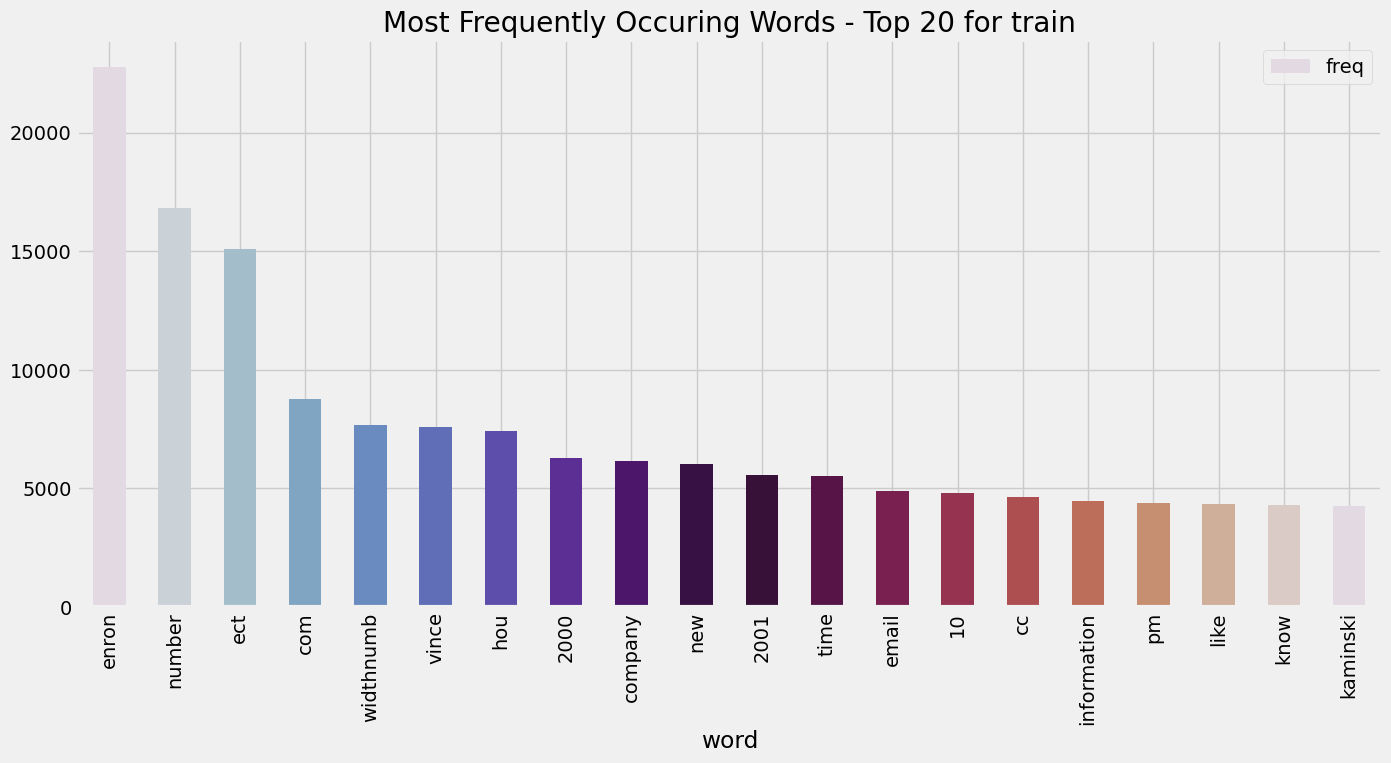

In [19]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for test_edit')

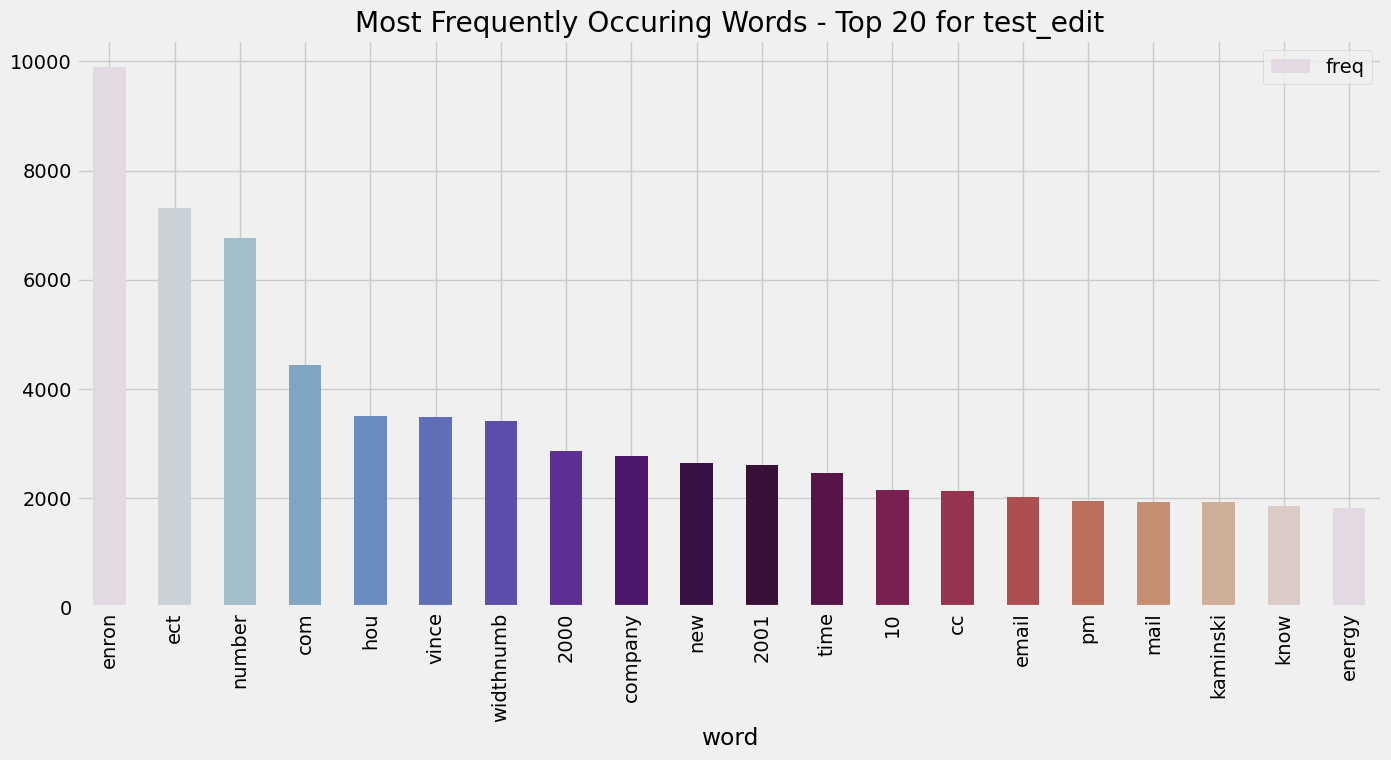

In [20]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for test_edit")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 train')

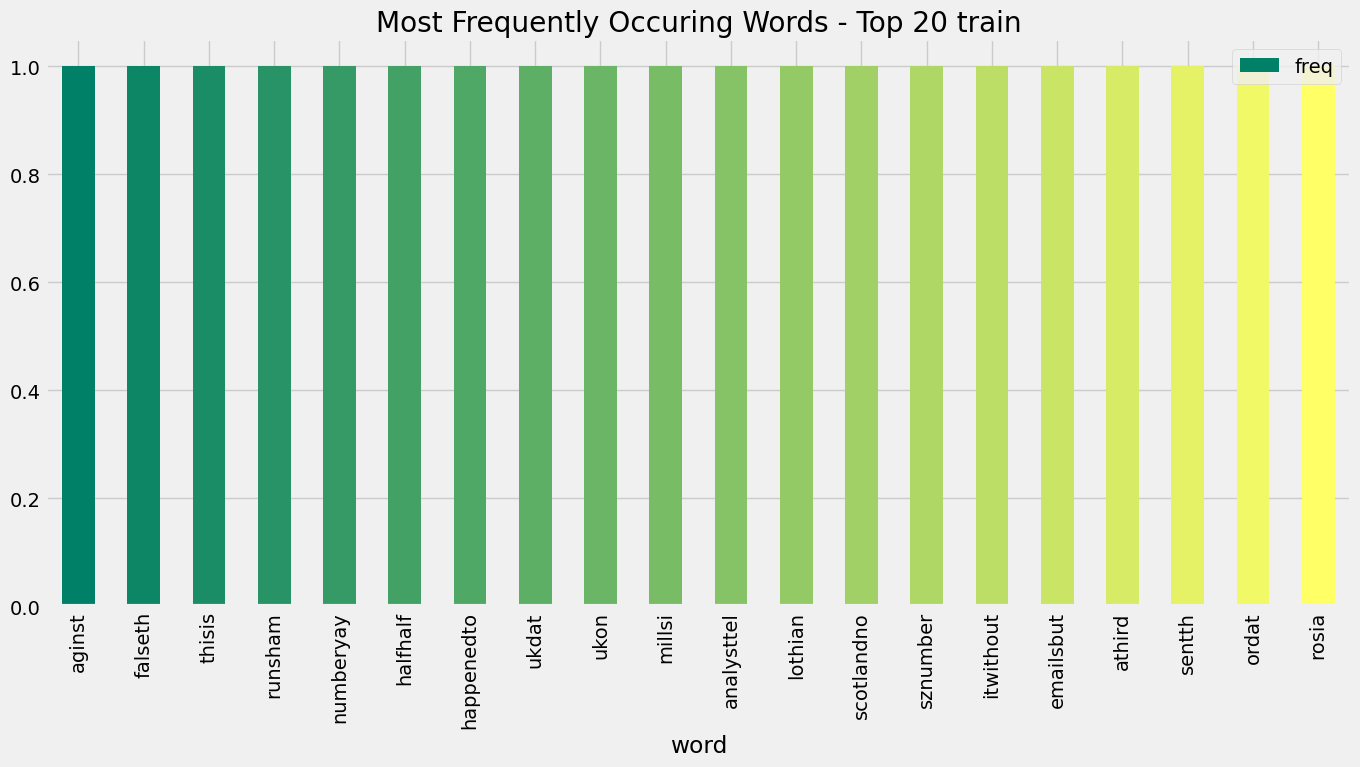

In [21]:

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 test_edit')

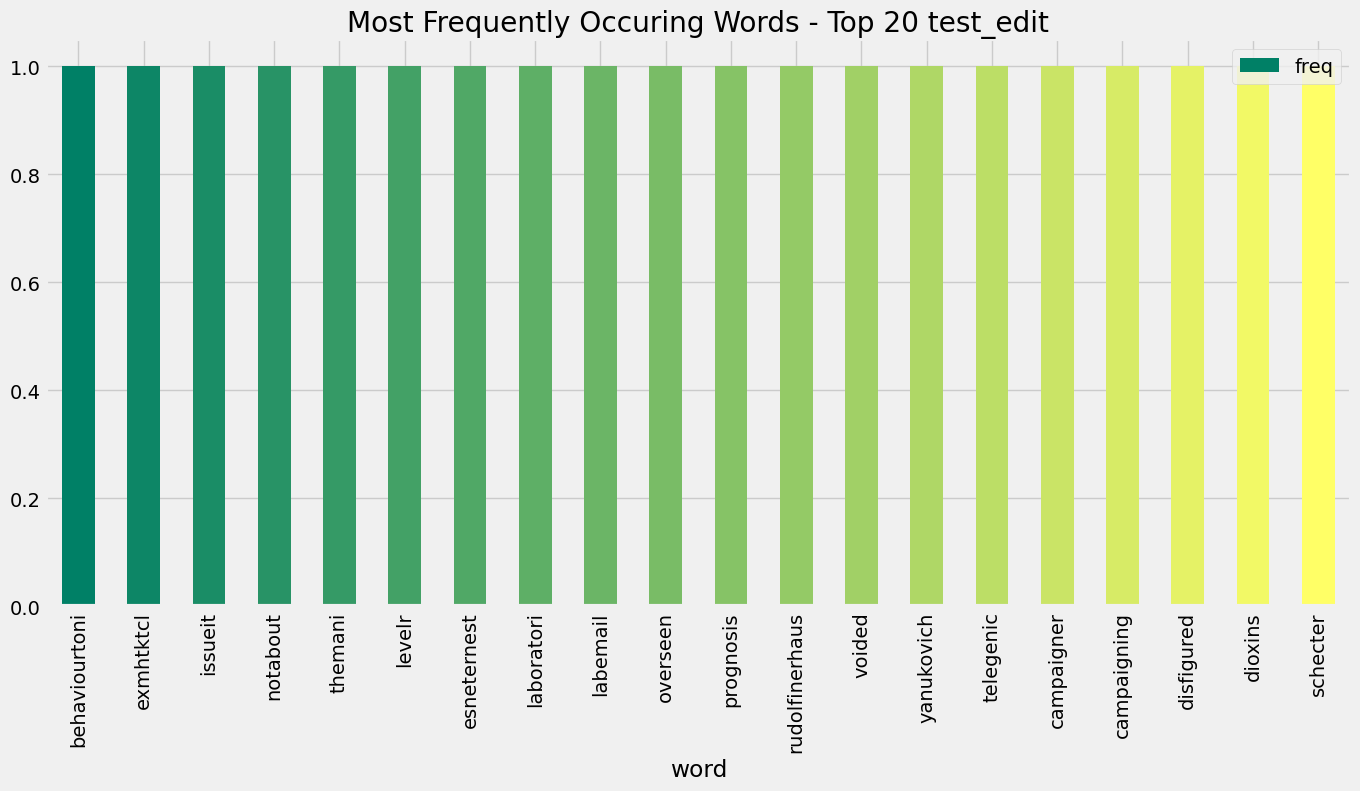

In [22]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 test_edit")

***
### apply the vectorizer


In [23]:
vectorizer  = TfidfVectorizer(max_features = 5000,
                            max_df=0.8,
                            min_df=5,
                            ngram_range=(1,3))

In [24]:
vectors = vectorizer.fit_transform(train['Body'])

In [25]:
vectors_test = vectorizer.transform(test_edit['Body'])

In [26]:
feature_names = vectorizer.get_feature_names_out()

In [27]:
dense = vectors.todense()
denselist = dense.tolist()

In [28]:
dense_test = vectors_test.todense()
denselist_test = dense_test.tolist()

In [29]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word >0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords.append(keywords)

In [30]:
print(all_keywords[0])

['certain', 'clear', 'contact', 'contact information', 'details', 'doc', 'get', 'gone', 'holiday', 'information', 'kevin', 'new', 'news', 'next', 'next week', 'plan', 'quite', 'return', 'stuff', 'swaps', 'total', 'unable', 'vince', 'wednesday', 'week', 'work']


In [31]:
print(train['Body'][0])

new jcc stuff vince gone wednesday next week plan work holiday contact information doc news get total return swaps finished unable nail certain details concepts quite clear kevin k


In [32]:
all_keywords_test = []

for description in denselist_test:
    x=0
    keywords = []
    for word in description:
        if word >0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords_test.append(keywords)

In [33]:
print(all_keywords_test[0])

['75', 'best', 'cancel', 'changed', 'day', 'dear', 'dear sir', 'get', 'home', 'introduce', 'leading', 'lu', 'mail', 'man', 'meds', 'nice', 'nice day', 'one', 'online', 'percent', 'purchas', 'save', 'shop', 'sir', 'today', 'top', 'total']


In [34]:
print(test_edit['Body'][0])

changed man dear sir madam p prisonhouse leased introduce one leading online pharmaceutical sociable shops save 75 ahorse percent meds today medz pretext mail shop overprize vla r palaeographer arranger lal affiliation lu oxonian g cancel c paratroops speedily val predisposition sandmanyother purchas indentation e get top quai christendom ity best pri victor ces total confi tightener dentiaiity home deii blench nice day


## Modeling

In [35]:
true_k = 2

model = KMeans(n_clusters=true_k,
              init="k-means++",
              max_iter=200,
              n_init=1)

In [36]:
model.fit(vectors)

KMeans(max_iter=200, n_clusters=2, n_init=1)

In [37]:
order_centroids = model.cluster_centers_.argsort()[:,::-1]

In [38]:
terms = vectorizer.get_feature_names_out()

   ### lets see the overlap words

In [39]:
with open("trc_results.txt", "w",encoding="utf-8") as f:
    for i in  range(true_k):
        f.write(f"Cluster{i}")
        f.write('\n')
        for ind in order_centroids[i,:10]:
            f.write('%s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

## Predict

In [40]:
kmean_indices = model.fit_predict(vectors)

In [41]:
train['cluster']=kmean_indices

In [57]:
train['cluster'].value_counts()

0    11839
1     1314
Name: cluster, dtype: int64

In [43]:
train['Label'].value_counts()

0.0    8400
1.0    4753
Name: Label, dtype: int64

In [44]:
y_true = train['Label']

In [69]:
from sklearn.metrics import precision_score
precision_score(y_true, kmean_indices)

0.40146971872624376

In [70]:
print(confusion_matrix(y_true,kmean_indices))
print("Precision : ", precision_score(y_true,kmean_indices,average=None))


[[1314 7086]
 [   0 4753]]
Precision :  [1.         0.40146972]


## for test

In [66]:
y_test_pred = model.predict(vectors_test)

In [67]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =y_test_pred # our model predictions on the test dataset
submission

,id,Target
0,22406,1
1,19495,1
2,59875,1
3,40297,1
4,50696,1
...,...,...
5633,79976,1
5634,53867,1
5635,50221,1
5636,64131,1


In [68]:
submission.to_csv('eman_try_2_submission.csv', index=False)